In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import nltk

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
df = pd.read_csv('/content/tweet_emotions.csv.zip')

In [12]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


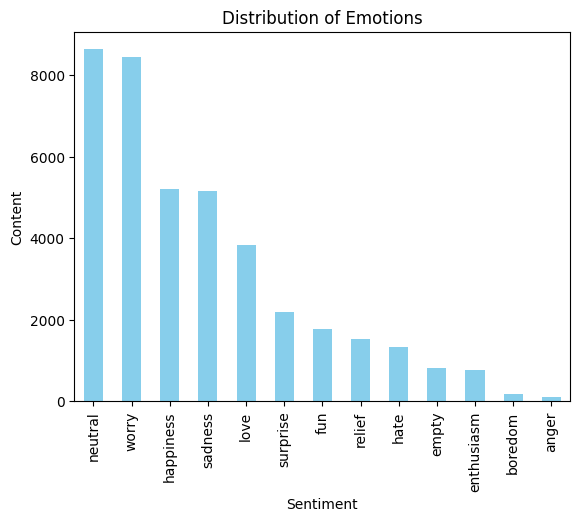

In [16]:
df['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Sentiment')
plt.ylabel('Content')
plt.show()


In [19]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_content'] = df['content'].apply(clean_text)
df[['content', 'clean_content']].head()


,content,clean_content
0,@tiffanylue i know i was listenin to bad habi...,tiffanylue know listenin bad habit earlier sta...
1,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends soon
4,@dannycastillo We want to trade with someone w...,dannycastillo want trade someone houston ticke...


In [20]:
X = df['clean_content']
y = df['sentiment']

In [21]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.07      0.01      0.02       338
   happiness       0.34      0.36      0.35      1028
        hate       0.50      0.16      0.24       268
        love       0.50      0.37      0.43       762
     neutral       0.34      0.57      0.42      1740
      relief       0.35      0.02      0.04       352
     sadness       0.34      0.24      0.28      1046
    surprise       0.35      0.05      0.09       425
       worry       0.33      0.48      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.27      0.17      0.17      8000
weighted avg       0.34      0.35      0.31      8000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


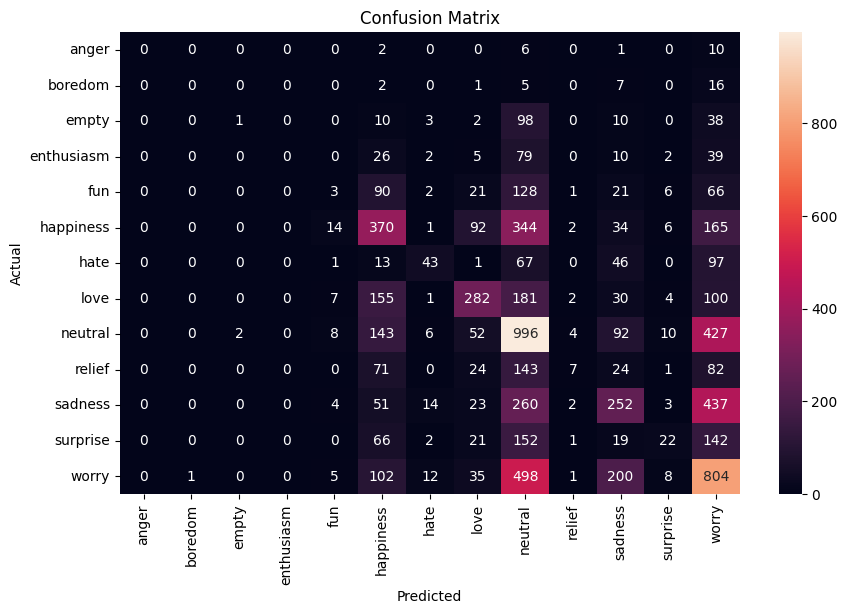

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

In [29]:
sample_texts = [
    "I am feeling great today!",
    "This is the worst experience ever.",
    "I'm scared of what's going to happen."
]

sample_clean = [clean_text(text) for text in sample_texts]
sample_vector = tfidf.transform(sample_clean)
sample_preds = model.predict(sample_vector)

for text, label in zip(sample_texts, sample_preds):
    print(f"Text: {text} --> Predicted Sentiment: {label}")


Text: I am feeling great today! --> Predicted Sentiment: happiness
Text: This is the worst experience ever. --> Predicted Sentiment: worry
Text: I'm scared of what's going to happen. --> Predicted Sentiment: worry
